<a href="https://colab.research.google.com/github/AnUsHkAIT/Hex-Softwares/blob/main/Project_3_Analyzing_and_Visualizing_Movie_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
import os

zip_file_path = '/content/genome_scores.csv.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

extracted_files = os.listdir('/content/')
print("Extracted files:", extracted_files)

csv_file_path = [f for f in extracted_files if f.endswith('.csv')][0]
df = pd.read_csv(f'/content/{csv_file_path}')

# Display the first few rows
print(df.head())


Extracted files: ['.config', '.ipynb_checkpoints', 'genome_scores.csv.zip', 'genome_scores.csv', 'sample_data']
   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675


In [ ]:
print(df.info())

print(df.describe())

df = df.dropna()

df['relevance'] = pd.to_numeric(df['relevance'], errors='coerce')

print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB
None
            movieId         tagId     relevance
count  1.170977e+07  1.170977e+07  1.170977e+07
mean   2.584297e+04  5.645000e+02  1.164833e-01
std    3.467615e+04  3.256254e+02  1.542463e-01
min    1.000000e+00  1.000000e+00  2.500000e-04
25%    2.926000e+03  2.827500e+02  2.425000e-02
50%    6.017000e+03  5.645000e+02  5.650000e-02
75%    4.606200e+04  8.462500e+02  1.415000e-01
max    1.311700e+05  1.128000e+03  1.000000e+00
Missing values:
 movieId      0
tagId        0
relevance    0
dtype: int64


In [ ]:
# Summary statistics for the 'relevance' column
mean_relevance = df['relevance'].mean()
median_relevance = df['relevance'].median()
mode_relevance = df['relevance'].mode()[0]

print(f"Mean Relevance: {mean_relevance:.2f}")
print(f"Median Relevance: {median_relevance:.2f}")
print(f"Mode Relevance: {mode_relevance:.2f}")


Mean Relevance: 0.12
Median Relevance: 0.06
Mode Relevance: 0.01


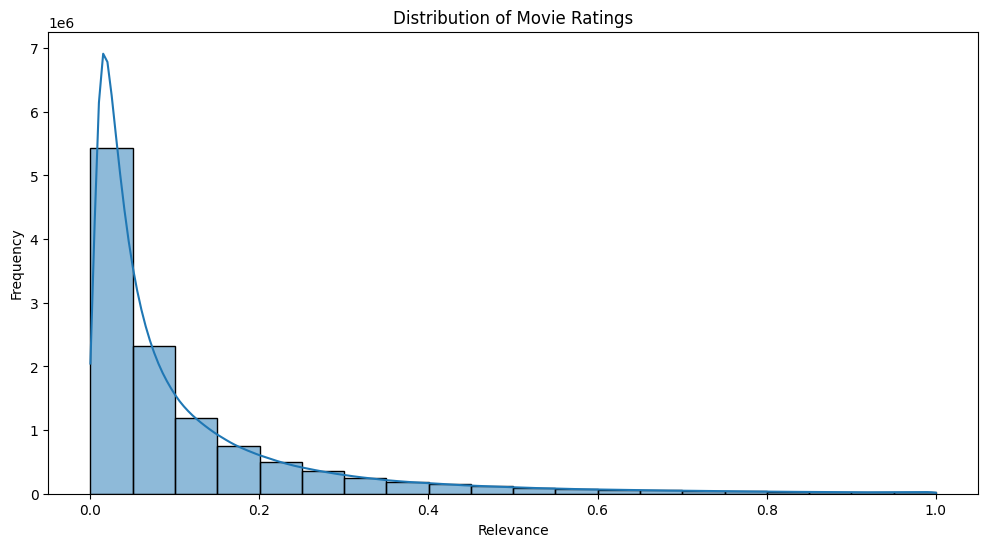

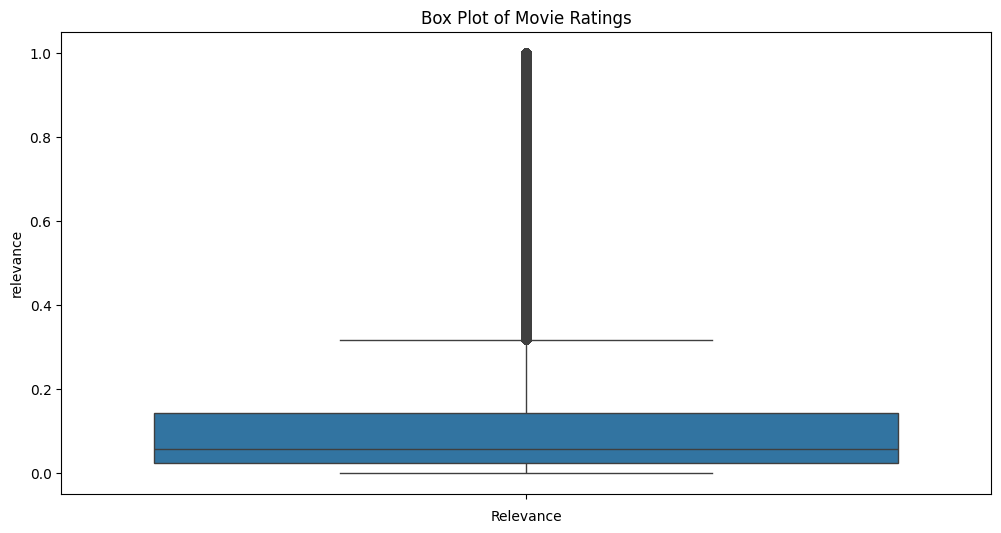

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of relevance
plt.figure(figsize=(12, 6))
sns.histplot(df['relevance'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Relevance')
plt.ylabel('Frequency')
plt.show()

# Box Plot of relevance
plt.figure(figsize=(12, 6))
sns.boxplot(df['relevance'])
plt.title('Box Plot of Movie Ratings')
plt.xlabel('Relevance')
plt.show()


In [10]:
# Assuming 'movieId' is unique and 'relevance' is the rating
top_rated_movies = df[['movieId', 'relevance']].groupby('movieId').mean().sort_values(by='relevance', ascending=False).head(10)
print("Top-Rated Movies:")
print(top_rated_movies)


Top-Rated Movies:
         relevance
movieId           
2571      0.245926
27667     0.243999
112582    0.242010
318       0.239651
2959      0.239551
119139    0.237292
40697     0.236941
4226      0.233049
50        0.231736
4878      0.228782


In [12]:
import ipywidgets as widgets
from IPython.display import display

# Create dropdown for movieId
dropdown = widgets.Dropdown(
    options=df['movieId'].unique(),
    description='Movie ID:',
    disabled=False
)

# Display selected movie's details
def on_movie_change(change):
    selected_movie = change['new']
    movie_details = df[df['movieId'] == selected_movie]
    print(movie_details)

dropdown.observe(on_movie_change, names='value')
display(dropdown)


Dropdown(description='Movie ID:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, …